In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

In [93]:
data = pd.read_csv('search_clustering.csv', engine='python')
# feature engineering & extraction
data

,pubmed_id,title,abstract,copyrights,publication_date,authors,keywords,journal,conclusions,methods,results,Rank,Total Cites,Journal Impact Factor,Eigenfactor Score
0,33212413,COVID-19 as a risk factor for Alzheimer's dise...,NaN,NaN,2020-11-20,"[{'lastname': 'Daugherty', 'firstname': 'Ana M...",[],psychiatry research,NaN,NaN,NaN,5454,"21,802",2.118,0.03406
1,33212413,COVID-19 as a risk factor for Alzheimer's dise...,NaN,NaN,2020-11-20,"[{'lastname': 'Daugherty', 'firstname': 'Ana M...",[],psychiatry research,NaN,NaN,NaN,5454,"21,802",2.118,0.03406
2,32829072,Galantamine-Memantine combination in the treat...,Alzheimer's disease (AD) is the most prevalent...,Copyright © 2020 Elsevier B.V. All rights rese...,2020-08-24,"[{'lastname': 'Koola', 'firstname': 'Maju Math...","['Aducanumab', ""Alzheimer's disease"", 'Galanta...",psychiatry research,NaN,NaN,NaN,5454,"21,802",2.118,0.03406
3,32829072,Galantamine-Memantine combination in the treat...,Alzheimer's disease (AD) is the most prevalent...,Copyright © 2020 Elsevier B.V. All rights rese...,2020-08-24,"[{'lastname': 'Koola', 'firstname': 'Maju Math...","['Aducanumab', ""Alzheimer's disease"", 'Galanta...",psychiatry research,NaN,NaN,NaN,5454,"21,802",2.118,0.03406
4,32763552,High depression and anxiety in people with Alz...,To cope with Covid-19 and limits its spread am...,Copyright © 2020 Elsevier B.V. All rights rese...,2020-08-09,"[{'lastname': 'El Haj', 'firstname': 'Mohamad'...","[""Alzheimer's disease"", 'Anxiety', 'Coronaviru...",psychiatry research,NaN,NaN,NaN,5454,"21,802",2.118,0.03406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3336,32607937,Increased expression and retention of the secr...,The secretory pathway of neurons and endocrine...,NaN,2020-07-02,"[{'lastname': 'Shakya', 'firstname': 'Manita',...","['Cell stress', 'Cell viability', 'PCSK1N', 'S...",cell stress & chaperones,NaN,NaN,NaN,3458,"3,368",2.892,0.00400
3337,32607444,Mechanisms of γ-Secretase Activation and Subst...,"Amyloid β-peptide, the principal component of ...",Copyright © 2020 American Chemical Society.,2020-07-02,"[{'lastname': 'Bhattarai', 'firstname': 'Apurb...",[],acs central science,NaN,NaN,NaN,208,"6,666",12.685,0.02681
3338,32604473,"Gelatin grafted poly(D,L-lactide) as an inhibi...",Amyloids are a group of proteins that are capa...,© 2020 Wiley Periodicals LLC.,2020-07-01,"[{'lastname': 'Balavigneswaran', 'firstname': ...","['amyloid fibrils', 'gelatin grafting', 'hemoc...",biopolymers,NaN,NaN,NaN,6354,"9,185",1.854,0.00384
3339,32603698,Nailfold capillaroscopy in common non-rheumati...,The role of nailfold capillaroscopy (NC) in co...,Copyright © 2020 Elsevier Inc. All rights rese...,2020-07-01,"[{'lastname': 'Ciaffi', 'firstname': 'Jacopo',...","[""Alzheimer's disease"", 'Anorexia nervosa', 'C...",microvascular research,Abnormal capillaroscopic findings are not unco...,NaN,We included 25 articles. Diabetes mellitus (11...,3829,"4,028",2.73,0.00314


In [94]:
data.dtypes


pubmed_id                  int64
title                     object
abstract                  object
copyrights                object
publication_date          object
authors                   object
keywords                  object
journal                   object
conclusions               object
methods                   object
results                   object
Rank                       int64
Total Cites               object
Journal Impact Factor     object
Eigenfactor Score        float64
dtype: object

In [95]:
data['publication_date'] = pd.to_datetime(data.publication_date, errors ='coerce')
data['published_year'] = pd.DatetimeIndex(data.publication_date).year
data['published_month'] = pd.DatetimeIndex(data.publication_date).month

In [96]:
data.columns


Index(['pubmed_id', 'title', 'abstract', 'copyrights', 'publication_date',
       'authors', 'keywords', 'journal', 'conclusions', 'methods', 'results',
       'Rank', 'Total Cites', 'Journal Impact Factor', 'Eigenfactor Score',
       'published_year', 'published_month'],
      dtype='object')

In [97]:
data

,pubmed_id,title,abstract,copyrights,publication_date,authors,keywords,journal,conclusions,methods,results,Rank,Total Cites,Journal Impact Factor,Eigenfactor Score,published_year,published_month
0,33212413,COVID-19 as a risk factor for Alzheimer's dise...,NaN,NaN,2020-11-20,"[{'lastname': 'Daugherty', 'firstname': 'Ana M...",[],psychiatry research,NaN,NaN,NaN,5454,"21,802",2.118,0.03406,2020,11
1,33212413,COVID-19 as a risk factor for Alzheimer's dise...,NaN,NaN,2020-11-20,"[{'lastname': 'Daugherty', 'firstname': 'Ana M...",[],psychiatry research,NaN,NaN,NaN,5454,"21,802",2.118,0.03406,2020,11
2,32829072,Galantamine-Memantine combination in the treat...,Alzheimer's disease (AD) is the most prevalent...,Copyright © 2020 Elsevier B.V. All rights rese...,2020-08-24,"[{'lastname': 'Koola', 'firstname': 'Maju Math...","['Aducanumab', ""Alzheimer's disease"", 'Galanta...",psychiatry research,NaN,NaN,NaN,5454,"21,802",2.118,0.03406,2020,8
3,32829072,Galantamine-Memantine combination in the treat...,Alzheimer's disease (AD) is the most prevalent...,Copyright © 2020 Elsevier B.V. All rights rese...,2020-08-24,"[{'lastname': 'Koola', 'firstname': 'Maju Math...","['Aducanumab', ""Alzheimer's disease"", 'Galanta...",psychiatry research,NaN,NaN,NaN,5454,"21,802",2.118,0.03406,2020,8
4,32763552,High depression and anxiety in people with Alz...,To cope with Covid-19 and limits its spread am...,Copyright © 2020 Elsevier B.V. All rights rese...,2020-08-09,"[{'lastname': 'El Haj', 'firstname': 'Mohamad'...","[""Alzheimer's disease"", 'Anxiety', 'Coronaviru...",psychiatry research,NaN,NaN,NaN,5454,"21,802",2.118,0.03406,2020,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3336,32607937,Increased expression and retention of the secr...,The secretory pathway of neurons and endocrine...,NaN,2020-07-02,"[{'lastname': 'Shakya', 'firstname': 'Manita',...","['Cell stress', 'Cell viability', 'PCSK1N', 'S...",cell stress & chaperones,NaN,NaN,NaN,3458,"3,368",2.892,0.00400,2020,7
3337,32607444,Mechanisms of γ-Secretase Activation and Subst...,"Amyloid β-peptide, the principal component of ...",Copyright © 2020 American Chemical Society.,2020-07-02,"[{'lastname': 'Bhattarai', 'firstname': 'Apurb...",[],acs central science,NaN,NaN,NaN,208,"6,666",12.685,0.02681,2020,7
3338,32604473,"Gelatin grafted poly(D,L-lactide) as an inhibi...",Amyloids are a group of proteins that are capa...,© 2020 Wiley Periodicals LLC.,2020-07-01,"[{'lastname': 'Balavigneswaran', 'firstname': ...","['amyloid fibrils', 'gelatin grafting', 'hemoc...",biopolymers,NaN,NaN,NaN,6354,"9,185",1.854,0.00384,2020,7
3339,32603698,Nailfold capillaroscopy in common non-rheumati...,The role of nailfold capillaroscopy (NC) in co...,Copyright © 2020 Elsevier Inc. All rights rese...,2020-07-01,"[{'lastname': 'Ciaffi', 'firstname': 'Jacopo',...","[""Alzheimer's disease"", 'Anorexia nervosa', 'C...",microvascular research,Abnormal capillaroscopic findings are not unco...,NaN,We included 25 articles. Diabetes mellitus (11...,3829,"4,028",2.73,0.00314,2020,7


In [98]:
df_fit = data[['pubmed_id','published_year', 'published_month', 'journal', 'Journal Impact Factor', 'Eigenfactor Score']]

In [99]:
#df_fit['Journal Impact Factor']= df_fit['Journal Impact Factor'].astype(float) 
type(df_fit['Journal Impact Factor'])

pandas.core.series.Series

In [100]:
df_fit = df_fit.dropna(subset=['Journal Impact Factor'])
df_fit['Journal Impact Factor'] = df_fit['Journal Impact Factor'].apply(lambda x: float(x.replace('Not Available', '0')) if type(x) == str else x)


In [101]:
df_fit.dtypes

pubmed_id                  int64
published_year             int64
published_month            int64
journal                   object
Journal Impact Factor    float64
Eigenfactor Score        float64
dtype: object

In [102]:
#df[column] = (df[column].str.split()).apply(lambda x: float(x[0].replace(',', '')))
#df_fit = df_fit.dropna(subset=['Journal Impact Factor']) 

#df_fit['Journal Impact Factor']= df_fit['Journal Impact Factor'].astype(float) 

df_fit["ranking_score"] = df_fit["published_year"]*0.3/1000 \
                            + df_fit["published_month"]*0.2/10 \
                            + df_fit["Journal Impact Factor"]*0.5
df_fit.sort_values("ranking_score", ascending=False).reset_index(drop=True)

,pubmed_id,published_year,published_month,journal,Journal Impact Factor,Eigenfactor Score,ranking_score
0,33149296,2020,11,nature,42.778,1.21673,22.2150
1,33097841,2020,10,nature,42.778,1.21673,22.1950
2,32999463,2020,10,nature,42.778,1.21673,22.1950
3,32879487,2020,9,nature,42.778,1.21673,22.1750
4,32627779,2020,7,chemical society reviews,42.846,0.22923,22.1690
...,...,...,...,...,...,...,...
3336,32730499,2020,7,revista medica de chile,0.531,0.00140,1.0115
3337,32760897,2020,8,turkish journal of physical medicine and rehab...,0.308,0.00021,0.9200
3338,33134975,2020,11,bmc chemistry,0.000,0.00000,0.8260
3339,33183222,2020,11,bmc molecular and cell biology,0.000,0.00000,0.8260


In [103]:
df_fit = pd.get_dummies(df_fit, columns=['journal'], drop_first = True)
#df_fit = df_fit.np.all(np.isfinite(mat))
df_fit

,pubmed_id,published_year,published_month,Journal Impact Factor,Eigenfactor Score,ranking_score,journal_aaps pharmscitech,journal_academic radiology,journal_acs applied materials & interfaces,journal_acs central science,...,journal_upsala journal of medical sciences,journal_vaccines,journal_veterinary pathology,journal_vitamins and hormones,journal_wiener klinische wochenschrift,journal_world journal of clinical cases,journal_world journal of gastroenterology,journal_world journal of psychiatry,journal_world journal of stem cells,journal_yonsei medical journal
0,33212413,2020,11,2.118,0.03406,1.8850,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,33212413,2020,11,2.118,0.03406,1.8850,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,32829072,2020,8,2.118,0.03406,1.8250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,32829072,2020,8,2.118,0.03406,1.8250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,32763552,2020,8,2.118,0.03406,1.8250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3336,32607937,2020,7,2.892,0.00400,2.1920,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3337,32607444,2020,7,12.685,0.02681,7.0885,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3338,32604473,2020,7,1.854,0.00384,1.6730,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3339,32603698,2020,7,2.730,0.00314,2.1110,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
df_fit["Eigenfactor Score"].fillna(0, inplace = True) 
df_fit["Journal Impact Factor"].fillna(0, inplace = True)  
df_fit["ranking_score"].fillna(0, inplace = True)  

df_fit 

,pubmed_id,published_year,published_month,Journal Impact Factor,Eigenfactor Score,ranking_score,journal_aaps pharmscitech,journal_academic radiology,journal_acs applied materials & interfaces,journal_acs central science,...,journal_upsala journal of medical sciences,journal_vaccines,journal_veterinary pathology,journal_vitamins and hormones,journal_wiener klinische wochenschrift,journal_world journal of clinical cases,journal_world journal of gastroenterology,journal_world journal of psychiatry,journal_world journal of stem cells,journal_yonsei medical journal
0,33212413,2020,11,2.118,0.03406,1.8850,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,33212413,2020,11,2.118,0.03406,1.8850,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,32829072,2020,8,2.118,0.03406,1.8250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,32829072,2020,8,2.118,0.03406,1.8250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,32763552,2020,8,2.118,0.03406,1.8250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3336,32607937,2020,7,2.892,0.00400,2.1920,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3337,32607444,2020,7,12.685,0.02681,7.0885,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3338,32604473,2020,7,1.854,0.00384,1.6730,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3339,32603698,2020,7,2.730,0.00314,2.1110,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


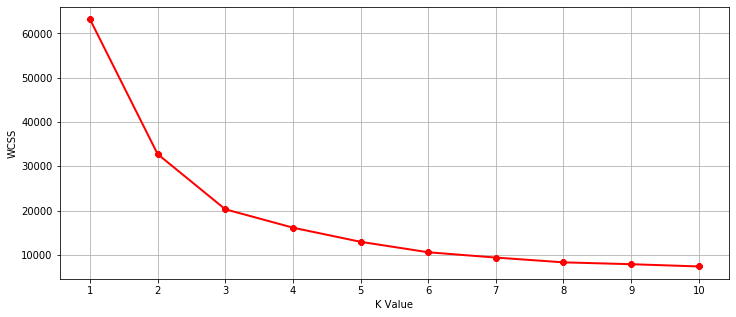

In [105]:
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df_fit.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,5))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [106]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(df_fit.iloc[:,1:]) # use 5 as cluster number hyperparameter
df_fit["label"] = kmeans.predict(df_fit.iloc[:,1:])
df_fit

,pubmed_id,published_year,published_month,Journal Impact Factor,Eigenfactor Score,ranking_score,journal_aaps pharmscitech,journal_academic radiology,journal_acs applied materials & interfaces,journal_acs central science,...,journal_vaccines,journal_veterinary pathology,journal_vitamins and hormones,journal_wiener klinische wochenschrift,journal_world journal of clinical cases,journal_world journal of gastroenterology,journal_world journal of psychiatry,journal_world journal of stem cells,journal_yonsei medical journal,label
0,33212413,2020,11,2.118,0.03406,1.8850,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,33212413,2020,11,2.118,0.03406,1.8850,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,32829072,2020,8,2.118,0.03406,1.8250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,32829072,2020,8,2.118,0.03406,1.8250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,32763552,2020,8,2.118,0.03406,1.8250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3336,32607937,2020,7,2.892,0.00400,2.1920,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3337,32607444,2020,7,12.685,0.02681,7.0885,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3338,32604473,2020,7,1.854,0.00384,1.6730,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3339,32603698,2020,7,2.730,0.00314,2.1110,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [107]:
def return_label(df):
    articles = []
    label = df.iloc[0]["label"]
    for i,row in df.iterrows():
        if row["label"] == label:
            articles.append(row["pubmed_id"])
    return articles

In [83]:
import numpy 
ids = return_label(df_fit)
ids = ids[:50]
ids = numpy.around(ids,0)
ids = np.round(ids.transpose()).astype(int)
print(ids)

[33212413 33212413 33212223 33197505 33197504 33069779 33212149 33169684
 33121988 33096116 33069735 32950573 32926928 33211469 32936627 33211296
 33206363 33011892 33211258 33159653 33108579 33095371 33068223 33211152
 33095320 33211111 33185677 33112398 33090226 33090224 33006621 32986108
 32902651 32865575 33211040 33191416 33210961 33210498 33210212 33180310
 33209212 33208787 33199792 33199776 33199752 33188256 33188215 33184307
 33177601 33173136]


In [108]:
df = pd.DataFrame(ids, columns =['pubmed_id']) 
df 

,pubmed_id
0,33212413
1,33212413
2,33212223
3,33197505
4,33197504
5,33069779
6,33212149
7,33169684
8,33121988
9,33096116


In [112]:
result = pd.merge(data,df ,on = 'pubmed_id',how = 'inner')
#result = result[['pubmed_id','title']]
result


,pubmed_id,title,abstract,copyrights,publication_date,authors,keywords,journal,conclusions,methods,results,Rank,Total Cites,Journal Impact Factor,Eigenfactor Score,published_year,published_month
0,33212413,COVID-19 as a risk factor for Alzheimer's dise...,NaN,NaN,2020-11-20,"[{'lastname': 'Daugherty', 'firstname': 'Ana M...",[],psychiatry research,NaN,NaN,NaN,5454,"21,802",2.118,0.03406,2020,11
1,33212413,COVID-19 as a risk factor for Alzheimer's dise...,NaN,NaN,2020-11-20,"[{'lastname': 'Daugherty', 'firstname': 'Ana M...",[],psychiatry research,NaN,NaN,NaN,5454,"21,802",2.118,0.03406,2020,11
2,33212413,COVID-19 as a risk factor for Alzheimer's dise...,NaN,NaN,2020-11-20,"[{'lastname': 'Daugherty', 'firstname': 'Ana M...",[],psychiatry research,NaN,NaN,NaN,5454,"21,802",2.118,0.03406,2020,11
3,33212413,COVID-19 as a risk factor for Alzheimer's dise...,NaN,NaN,2020-11-20,"[{'lastname': 'Daugherty', 'firstname': 'Ana M...",[],psychiatry research,NaN,NaN,NaN,5454,"21,802",2.118,0.03406,2020,11
4,33212223,CD36 in Alzheimer's disease: an overview of mo...,CD36 is a membrane protein with wide distribut...,Copyright © 2020 The Author(s). Published by E...,2020-11-20,"[{'lastname': 'Dobri', 'firstname': 'Ana-Maria...","['Alzheimer’s disease', 'CD36', 'SR-B2', 'amyl...",neuroscience,NaN,NaN,NaN,3175,"44,404",3.056,0.04477,2020,11
5,33197505,Alterations of Brain Networks in Alzheimer's D...,This study aimed to investigate the alteration...,Copyright © 2020. Published by Elsevier Ltd.,2020-11-17,"[{'lastname': 'Luo', 'firstname': 'Yuan', 'ini...","['Brain plasticity', 'Cerebellum', 'Functional...",neuroscience,NaN,NaN,NaN,3175,"44,404",3.056,0.04477,2020,11
6,33197504,LncRNA BACE1-AS promotes autophagy-mediated ne...,Alzheimer's disease (AD) is the most common ne...,Copyright © 2020 IBRO. Published by Elsevier L...,2020-11-17,"[{'lastname': 'Zhou', 'firstname': 'Yuan', 'in...","['ATG5', 'Alzheimer’s disease', 'LncRNA BACE1-...",neuroscience,NaN,NaN,NaN,3175,"44,404",3.056,0.04477,2020,11
7,33069779,"Inhibitor Kappa B Kinase β, Modulated by DJ-1/...",It has been demonstrated Inhibitor Kappa B Kin...,Copyright © 2020 IBRO. Published by Elsevier L...,2020-10-19,"[{'lastname': 'Chen', 'firstname': 'Wei-Ping',...","['Alzheimer’s disease', 'DJ-1', 'IKKβ', 'autop...",neuroscience,NaN,NaN,NaN,3175,"44,404",3.056,0.04477,2020,10
8,33212149,The glial-specific hypermethylated 3' untransl...,Epigenetic regulation plays an important role ...,Copyright © 2018. Published by Elsevier Inc.,2020-11-20,"[{'lastname': 'Lv', 'firstname': 'Lei', 'initi...","[""Alzheimer's disease"", 'Bioinformatic analysi...",life sciences,NaN,NaN,NaN,2276,"23,572",3.647,0.01914,2020,11
9,33169684,"Role of gut-brain axis, gut microbial composit...",Gut microbiota represents a diverse and dynami...,Copyright © 2020 Elsevier Inc. All rights rese...,2020-11-11,"[{'lastname': 'Kesika', 'firstname': 'Periyana...","[""Alzheimer's disease"", 'Amyloid protein', 'Gu...",life sciences,NaN,NaN,NaN,2276,"23,572",3.647,0.01914,2020,11


In [125]:
result_kmeans1 = result.iloc[:, 0:2] 
result_kmeans2 = result.iloc[:, 7:8]
result_kmeans = pd.concat([result_kmeans1,result_kmeans2],axis=1)

#result_kmeans = result['pubmed_id','title','journal']
result_kmeans = result_kmeans.drop_duplicates(subset=['pubmed_id'])
export_csv = result_kmeans.to_csv (r'recommend_test.csv', index = None, header=True) 
result_kmeans.head(50)

,pubmed_id,title,journal
0,33212413,COVID-19 as a risk factor for Alzheimer's dise...,psychiatry research
4,33212223,CD36 in Alzheimer's disease: an overview of mo...,neuroscience
5,33197505,Alterations of Brain Networks in Alzheimer's D...,neuroscience
6,33197504,LncRNA BACE1-AS promotes autophagy-mediated ne...,neuroscience
7,33069779,"Inhibitor Kappa B Kinase β, Modulated by DJ-1/...",neuroscience
8,33212149,The glial-specific hypermethylated 3' untransl...,life sciences
9,33169684,"Role of gut-brain axis, gut microbial composit...",life sciences
10,33121988,GLP-1 mimetics and cognition.,life sciences
11,33096116,Cannabidiol (CBD) enhanced the hippocampal imm...,life sciences
12,33069735,Marine n-3 polyunsaturated fatty acids: Effica...,life sciences
